In [72]:
import pandas as pd

In [73]:
import openpyxl

## Extra Assignment : Airbnb Europe EDA

## Data Wrangling

In [74]:
file = pd.ExcelFile("https://docs.google.com/spreadsheets/d/1ecopK6oyyb4d_7-QLrCr8YlgFrCetHU7-VQfnYej7JY/export/format=xlsx")

In [75]:
type(file)

pandas.io.excel._base.ExcelFile

In [76]:
print(file.sheet_names)

['amsterdam_weekdays', 'amsterdam_weekends', 'athens_weekdays', 'athens_weekends', 'berlin_weekends', 'berlin_weekdays', 'barcelona_weekdays', 'barcelona_weekends', 'budapest_weekdays', 'budapest_weekends', 'lisbon_weekdays', 'lisbon_weekends', 'london_weekdays', 'london_weekends', 'paris_weekdays', 'paris_weekends', 'rome_weekdays', 'rome_weekends', 'vienna_weekdays', 'vienna_weekends']


# Merging the tables into one Dataframe

In [77]:
sheets = ['amsterdam_weekdays', 'amsterdam_weekends', 'athens_weekdays', 'athens_weekends', 'berlin_weekends', 'berlin_weekdays', 'barcelona_weekdays', 'barcelona_weekends', 'budapest_weekdays', 'budapest_weekends', 'lisbon_weekdays', 'lisbon_weekends', 'london_weekdays', 'london_weekends', 'paris_weekdays', 'paris_weekends', 'rome_weekdays', 'rome_weekends', 'vienna_weekdays', 'vienna_weekends']  # list of sheet names you want to include
dfs = []  # empty list to store each sheet's DataFrame

with pd.ExcelFile(file) as xls:
    for sheet in sheets:
        df = pd.read_excel(xls, sheet, header=0)
        dfs.append(df)  # add each DataFrame to the list

# Concatenate all the DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

In [78]:
combined_df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,1794,715.938574,Entire home/apt,False,False,6,False,0,1,10,100,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136
51703,1795,304.793960,Entire home/apt,False,False,2,False,0,0,8,86,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296
51704,1796,637.168969,Entire home/apt,False,False,2,False,0,0,10,93,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460
51705,1797,301.054157,Private room,False,True,2,False,0,0,10,87,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200


# Creating new columns: "City", "Country", "Type of Day"

In [79]:
sheet_info = {
    "amsterdam_weekdays": {"city": "Amsterdam", "country": "Netherlands", "type": "Weekday"},
    "amsterdam_weekends": {"city": "Amsterdam", "country": "Netherlands", "type": "Weekend"},
    "athens_weekdays": {"city": "Athens", "country": "Greece", "type": "Weekday"},
    "athens_weekends": {"city": "Athens", "country": "Greece", "type": "Weekend"},
    "berlin_weekdays": {"city": "Berlin", "country": "Germany", "type": "Weekday"},
    "berlin_weekends": {"city": "Berlin", "country": "Germany", "type": "Weekend"},
    "barcelona_weekdays": {"city": "Barcelona", "country": "Spain", "type": "Weekday"},
    "barcelona_weekends": {"city": "Barcelona", "country": "Spain", "type": "Weekend"},
    "budapest_weekdays": {"city": "Budapest", "country": "Hungary", "type": "Weekday"},
    "budapest_weekends": {"city": "Budapest", "country": "Hungary", "type": "Weekend"},
    "lisbon_weekdays": {"city": "Lisbon", "country": "Portugal", "type": "Weekday"},
    "lisbon_weekends": {"city": "Lisbon", "country": "Portugal", "type": "Weekend"},
    "london_weekdays": {"city": "London", "country": "United Kingdom", "type": "Weekday"},
    "london_weekends": {"city": "London", "country": "United Kingdom", "type": "Weekend"},
    "paris_weekdays": {"city": "Paris", "country": "France", "type": "Weekday"},
    "paris_weekends": {"city": "Paris", "country": "France", "type": "Weekend"},
    "rome_weekdays": {"city": "Rome", "country": "Italy", "type": "Weekday"},
    "rome_weekends": {"city": "Rome", "country": "Italy", "type": "Weekend"},
    "vienna_weekdays": {"city": "Vienna", "country": "Austria", "type": "Weekday"},
    "vienna_weekends": {"city": "Vienna", "country": "Austria", "type": "Weekend"}
}



In [80]:
def process_sheets(file, sheets, sheet_info):
    dfs = []
    with pd.ExcelFile(file) as xls:
        for sheet in sheets:
            df = pd.read_excel(xls, sheet, header=0)
            df["City"] = sheet_info[sheet]["city"]
            df["Country"] = sheet_info[sheet]["country"]
            df["Weekday/Weekend"] = sheet_info[sheet]["type"]
            dfs.append(df)  # add each DataFrame to the list
    return pd.concat(dfs, ignore_index=True)

# Process all sheets and combine into a single DataFrame
combined_df = process_sheets(file, sheets, sheet_info)

combined_df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,Country,Weekday/Weekend
0,0,194.033698,Private room,False,True,2,False,1,0,10,...,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,Netherlands,Weekday
1,1,344.245776,Private room,False,True,4,False,0,0,8,...,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,Netherlands,Weekday
2,2,264.101422,Private room,False,True,2,False,0,1,9,...,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,Netherlands,Weekday
3,3,433.529398,Private room,False,True,4,False,0,1,9,...,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,Netherlands,Weekday
4,4,485.552926,Private room,False,True,2,True,0,0,10,...,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,Netherlands,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,1794,715.938574,Entire home/apt,False,False,6,False,0,1,10,...,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,Vienna,Austria,Weekend
51703,1795,304.793960,Entire home/apt,False,False,2,False,0,0,8,...,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,Vienna,Austria,Weekend
51704,1796,637.168969,Entire home/apt,False,False,2,False,0,0,10,...,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,Vienna,Austria,Weekend
51705,1797,301.054157,Private room,False,True,2,False,0,0,10,...,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,Vienna,Austria,Weekend


# Renaming the columns

In [81]:
combined_df.rename(columns={"realSum": "Price"}, inplace=True)
combined_df

,Unnamed: 0,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,Country,Weekday/Weekend
0,0,194.033698,Private room,False,True,2,False,1,0,10,...,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,Netherlands,Weekday
1,1,344.245776,Private room,False,True,4,False,0,0,8,...,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,Netherlands,Weekday
2,2,264.101422,Private room,False,True,2,False,0,1,9,...,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,Netherlands,Weekday
3,3,433.529398,Private room,False,True,4,False,0,1,9,...,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,Netherlands,Weekday
4,4,485.552926,Private room,False,True,2,True,0,0,10,...,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,Netherlands,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,1794,715.938574,Entire home/apt,False,False,6,False,0,1,10,...,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,Vienna,Austria,Weekend
51703,1795,304.793960,Entire home/apt,False,False,2,False,0,0,8,...,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,Vienna,Austria,Weekend
51704,1796,637.168969,Entire home/apt,False,False,2,False,0,0,10,...,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,Vienna,Austria,Weekend
51705,1797,301.054157,Private room,False,True,2,False,0,0,10,...,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,Vienna,Austria,Weekend


# Dropping the first column

In [82]:
combined_df.drop(combined_df.columns[0], axis=1, inplace=True)
combined_df

,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,Country,Weekday/Weekend
0,194.033698,Private room,False,True,2,False,1,0,10,93,...,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,Netherlands,Weekday
1,344.245776,Private room,False,True,4,False,0,0,8,85,...,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,Netherlands,Weekday
2,264.101422,Private room,False,True,2,False,0,1,9,87,...,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,Netherlands,Weekday
3,433.529398,Private room,False,True,4,False,0,1,9,90,...,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,Netherlands,Weekday
4,485.552926,Private room,False,True,2,True,0,0,10,98,...,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,Netherlands,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,715.938574,Entire home/apt,False,False,6,False,0,1,10,100,...,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,Vienna,Austria,Weekend
51703,304.793960,Entire home/apt,False,False,2,False,0,0,8,86,...,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,Vienna,Austria,Weekend
51704,637.168969,Entire home/apt,False,False,2,False,0,0,10,93,...,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,Vienna,Austria,Weekend
51705,301.054157,Private room,False,True,2,False,0,0,10,87,...,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,Vienna,Austria,Weekend


In [83]:
# Create 'Room_Type' column based on 'room_shared' and 'room_private'
combined_df["Room_Type"] = combined_df.apply(
    lambda row: "Shared" if row["room_shared"] == 1 else ("Private" if row["room_private"] == 1 else "Unknown"),
    axis=1
)

# Drop the original 'room_shared' and 'room_private' columns
combined_df.drop(columns=["room_shared", "room_private"], inplace=True)

# Display the combined DataFrame
print(combined_df)


            Price        room_type  person_capacity  host_is_superhost  multi  \
0      194.033698     Private room                2              False      1   
1      344.245776     Private room                4              False      0   
2      264.101422     Private room                2              False      0   
3      433.529398     Private room                4              False      0   
4      485.552926     Private room                2               True      0   
...           ...              ...              ...                ...    ...   
51702  715.938574  Entire home/apt                6              False      0   
51703  304.793960  Entire home/apt                2              False      0   
51704  637.168969  Entire home/apt                2              False      0   
51705  301.054157     Private room                2              False      0   
51706  133.230489     Private room                4               True      1   

       biz  cleanliness_rat

## Exloratory Questions


In [84]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   person_capacity             51707 non-null  int64  
 3   host_is_superhost           51707 non-null  bool   
 4   multi                       51707 non-null  int64  
 5   biz                         51707 non-null  int64  
 6   cleanliness_rating          51707 non-null  int64  
 7   guest_satisfaction_overall  51707 non-null  int64  
 8   bedrooms                    51707 non-null  int64  
 9   dist                        51707 non-null  float64
 10  metro_dist                  51707 non-null  float64
 11  attr_index                  51707 non-null  float64
 12  attr_index_norm             51707 non-null  float64
 13  rest_index                  517

In [85]:
combined_df.describe()

,Price,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


In [86]:
total_listings_per_city = combined_df.groupby('City').size().reset_index(name='Total_Listings')

In [87]:
listings_per_city_and_day_type = combined_df.groupby(['City', 'Weekday/Weekend']).size().reset_index(name='Listings_Count')


In [88]:
print("Total Listings per City:")
print(total_listings_per_city)
print("\nListings per City and Day Type:")
print(listings_per_city_and_day_type)

Total Listings per City:
        City  Total_Listings
0  Amsterdam            2080
1     Athens            5280
2  Barcelona            2833
3     Berlin            2484
4   Budapest            4022
5     Lisbon            5763
6     London            9993
7      Paris            6688
8       Rome            9027
9     Vienna            3537

Listings per City and Day Type:
         City Weekday/Weekend  Listings_Count
0   Amsterdam         Weekday            1103
1   Amsterdam         Weekend             977
2      Athens         Weekday            2653
3      Athens         Weekend            2627
4   Barcelona         Weekday            1555
5   Barcelona         Weekend            1278
6      Berlin         Weekday            1284
7      Berlin         Weekend            1200
8    Budapest         Weekday            2074
9    Budapest         Weekend            1948
10     Lisbon         Weekday            2857
11     Lisbon         Weekend            2906
12     London         Wee

In [89]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt



# Comparing the amount of listings between the cities

<AxesSubplot: xlabel='City', ylabel='count'>

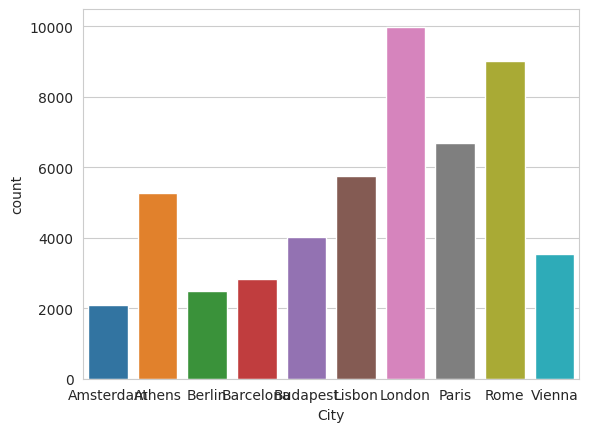

In [90]:
sns.countplot(x='City', data=combined_df)

## Conclusion
There are major differences in between the cities in the number of listings they have. With London and Rome offering users the most choices and Amsterdams and Berlin the least. 

# Most listings by City depending on type of day

<AxesSubplot: xlabel='City', ylabel='count'>

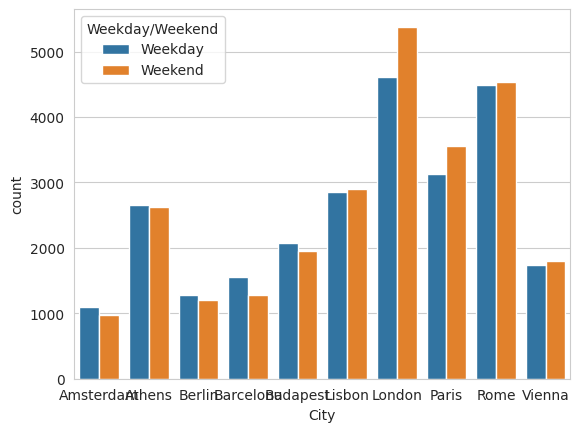

In [91]:
sns.countplot(x='City', hue='Weekday/Weekend', data=combined_df)

## Conclusion
### In most cities the number of listings only shows minor variation, in some cases declining, in others increasing. Only London offers a noticeable increase in listings on weekends. 


# What city offers the highest share of superhosts?

In [92]:
combined_df['host_status'] = combined_df['host_is_superhost'].map({True: 'Super Host', False: 'Normal Host'})
table = pd.crosstab(combined_df['City'], combined_df['host_is_superhost'], normalize='index' )
display(table)

host_is_superhost,False,True
City,,
Amsterdam,0.715865,0.284135
Athens,0.571402,0.428598
Barcelona,0.818567,0.181433
Berlin,0.742754,0.257246
Budapest,0.621084,0.378916
Lisbon,0.786049,0.213951
London,0.842590,0.157410
Paris,0.859300,0.140700
Rome,0.673313,0.326687


<AxesSubplot: xlabel='City'>

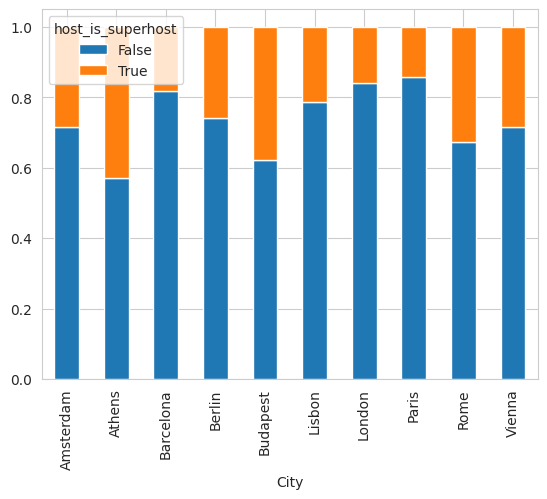

In [93]:
table.plot(kind='bar', stacked=True)

# Conclusion
There are some differences, when comparing the cities for their shares of superhosts. Athens offers the most with 42,8% of Superhosts. On the other end is Paris, only offering 14% Superhosts. 

## Which cities offer listings with 4 or more bedrooms?

<AxesSubplot: xlabel='City', ylabel='count'>

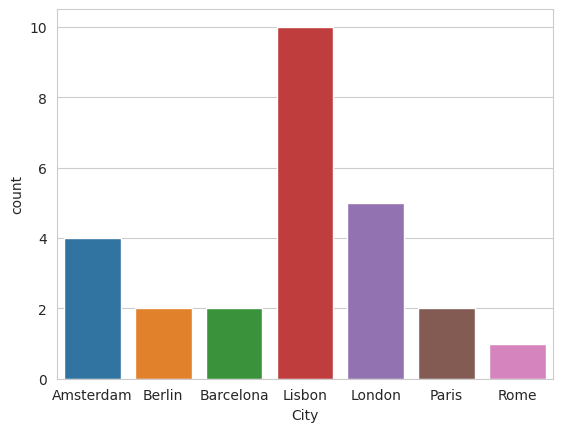

In [94]:
sns.countplot(x='City', data=combined_df[combined_df["bedrooms"] > 4])

## Conlusion
Large listings of more than 4 rooms are definitely rare on Airbnb. But Lisbon offers the biggest selection with 10 listings. 

## Which city offers the most entire (private) apartments?

<AxesSubplot: xlabel='City', ylabel='count'>

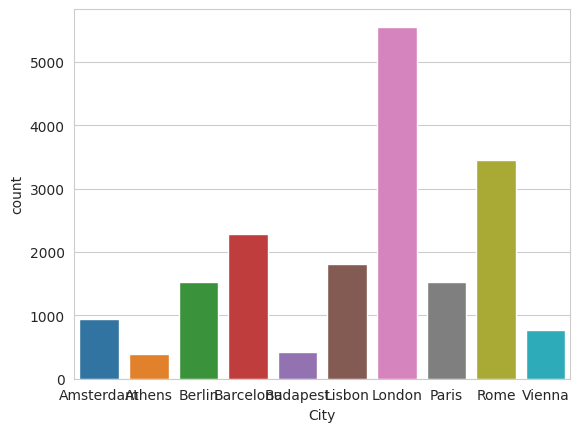

In [95]:
sns.countplot(x='City', data=combined_df[combined_df["Room_Type"]== "Private"])

# Conclusion
#### hen looking for an entire apartment the best largest amount of listings are in London. Athens on the other offers a very small amount of choices in this regard. 

# Does the ranking of the Airbnbs offer a large variety. Are there Differences in between cities?

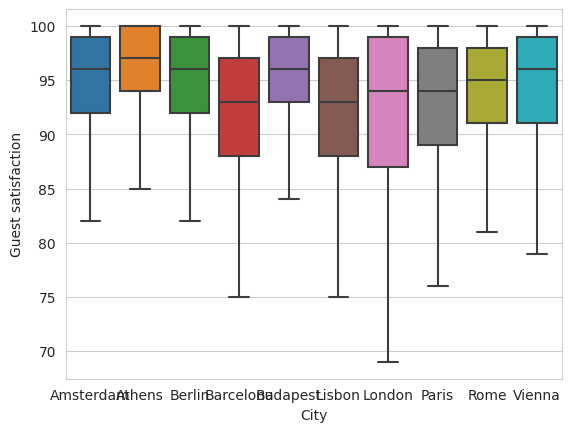

In [96]:
sns.boxplot(data=combined_df, x='City', y='guest_satisfaction_overall', showfliers=False)

plt.xlabel('City')
plt.ylabel('Guest satisfaction')
plt.show()

## Conclusion
#### Most certainly there is a variation in the Guest Satisfaction within the listings, with the biggest variation coming in London.

# What is the most common person capacity across all listings?

<AxesSubplot: xlabel='person_capacity', ylabel='count'>

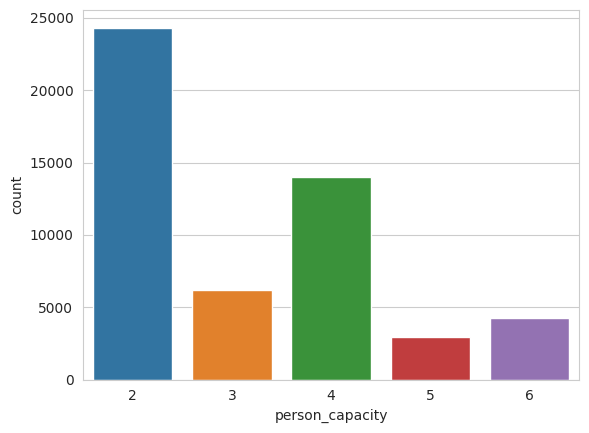

In [97]:
sns.countplot(x='person_capacity', data=combined_df)

## Conclusion
The amount of listings varies a lot depending on the person capacity. Listings for only 2 people offer by far the greatest amount of options.

## Is there a correlation between the person capacity and Guest satisfaction?

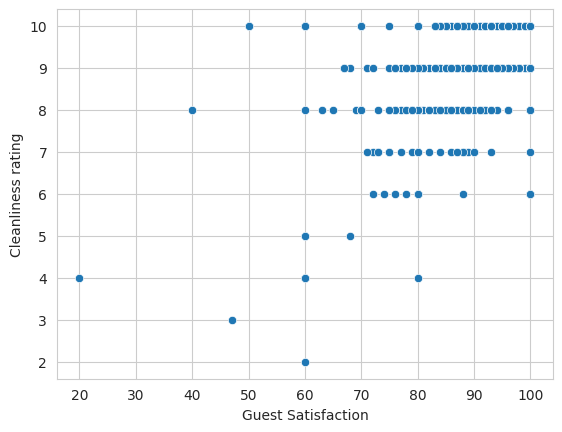

In [98]:
sns.scatterplot(x='guest_satisfaction_overall', y='cleanliness_rating', data=df)

plt.xlabel('Guest Satisfaction')
plt.ylabel('Cleanliness rating')
plt.show()

## Conclusion
#### We can see a clear correlation between the Cleanliness Rating and Guest Satisfaction indicating that customers value cleanliness highly.

# Testing of data

## Price difference between cities during weekdays
### Amsterdam and Athens

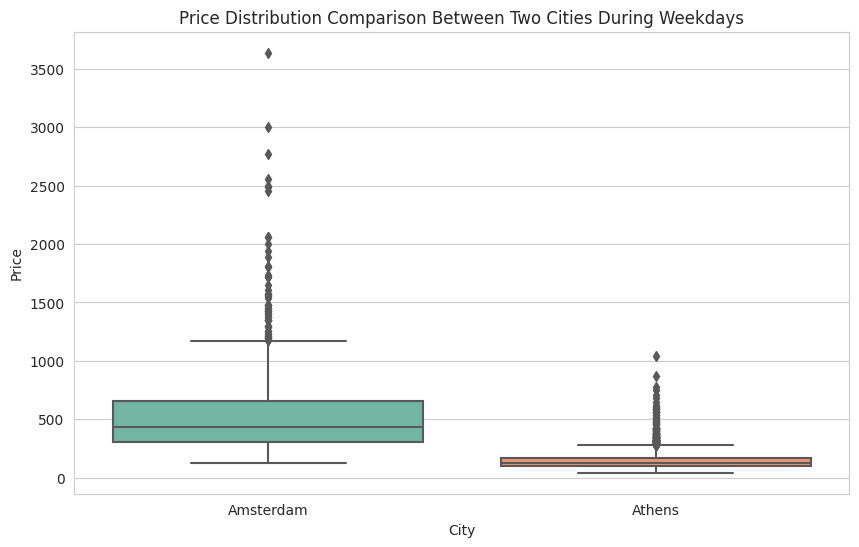

In [99]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='Price', data=combined_df[
    (combined_df['City'].isin(["Amsterdam", "Athens"])) &
    (combined_df['Weekday/Weekend'] == 'Weekday') &
    (combined_df["Price"]<= 5000)
], palette='Set2')

plt.title('Price Distribution Comparison Between Two Cities During Weekdays')
plt.xlabel('City')
plt.ylabel('Price')
plt.show()

## Conclusion
#### There is a clear difference as prices in Amsterdam far exceed those in Athens. Both in average, as well as within the outliers. 

## London and Paris 

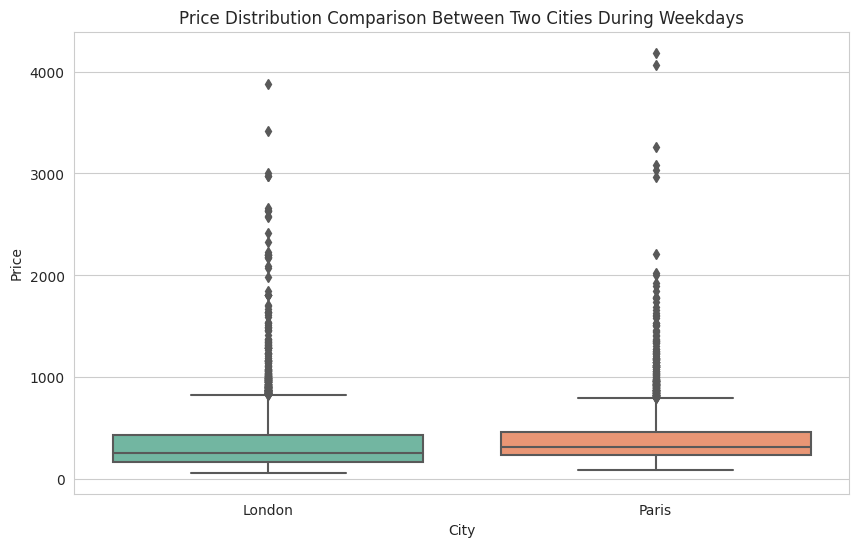

In [100]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='Price', data=combined_df[
    (combined_df['City'].isin(["Paris", "London"])) &
    (combined_df['Weekday/Weekend'] == 'Weekday') &
    (combined_df["Price"]<= 5000)
], palette='Set2')

plt.title('Price Distribution Comparison Between Two Cities During Weekdays')
plt.xlabel('City')
plt.ylabel('Price')
plt.show()

## Conclusion
#### There is no clear difference between the two. Paris is slightly more expensive in average, while London offers a greater variation in Prices, indicating listings in all Price ranges

## Lisbon and Vienna

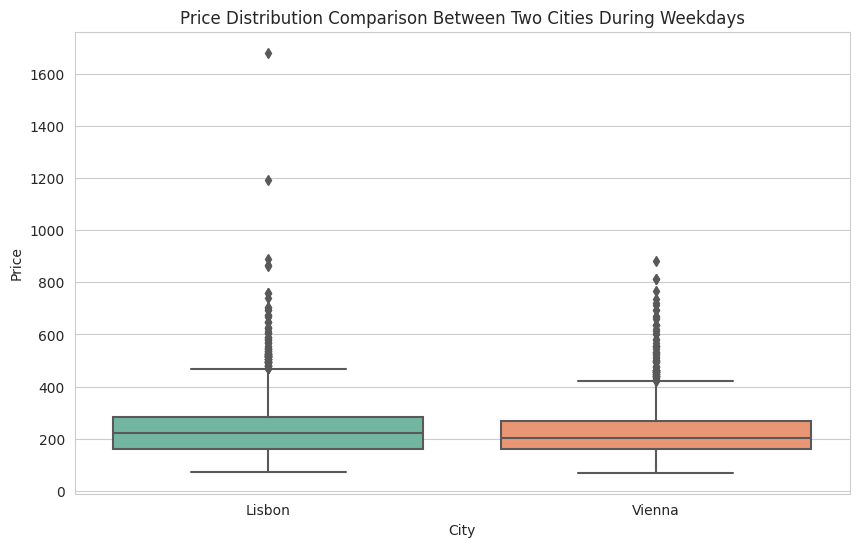

In [101]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='Price', data=combined_df[
    (combined_df['City'].isin(["Lisbon", "Vienna"])) &
    (combined_df['Weekday/Weekend'] == 'Weekday') &
    (combined_df["Price"]<= 5000)
], palette='Set2')

plt.title('Price Distribution Comparison Between Two Cities During Weekdays')
plt.xlabel('City')
plt.ylabel('Price')
plt.show()

## Conclusion
Lisbon and Vienna also offer very similar price ranges, but Lisbon shows more extreme outliers, indicating for more luxurious offers 

# To what extend do the prices differ between weekdays and weekends?

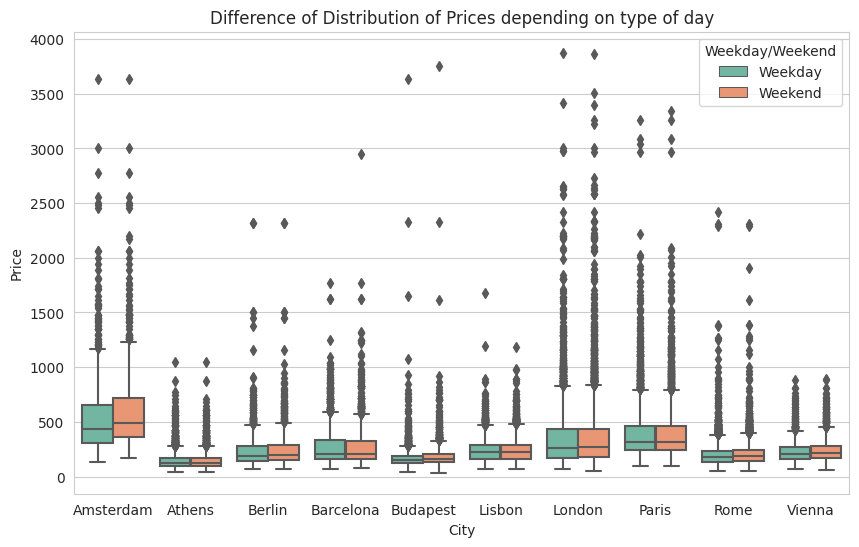

In [102]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='Price', hue="Weekday/Weekend", data=combined_df[
    (combined_df["Price"]<= 4000)
], palette='Set2')

plt.title('Difference of Distribution of Prices depending on type of day')
plt.xlabel('City')
plt.ylabel('Price')
plt.show()

## Conclusion
#### Prices are still quite similarly distributed depending on the type of day. Most city only show a small increase during weekends. The largest increase can be seen in Amsterdam. 

# Are offers from superhosts more expensive, then ones from regular hosts?

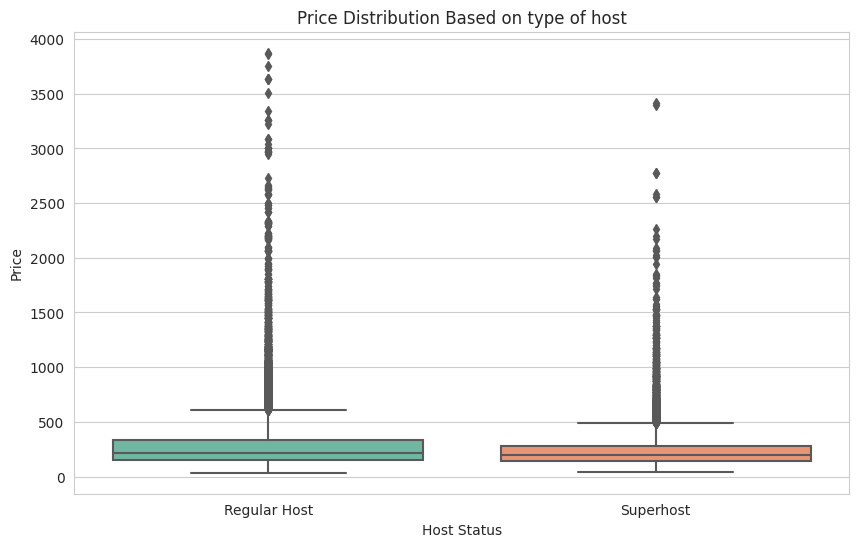

In [103]:
combined_df['host_status'] = combined_df['host_is_superhost'].map({True: 'Superhost', False: 'Regular Host'})
filtered_df = combined_df[combined_df['Price'] <= 4000]

plt.figure(figsize=(10, 6))
sns.boxplot(x='host_status', y='Price', data=filtered_df, palette='Set2')

plt.title('Price Distribution Based on type of host')
plt.xlabel('Host Status')
plt.ylabel('Price')
plt.show()


## Conclusion
#### No, not at all. While the average prices are almost identical, when conparing the price variation, both the upper whisker as well as outliers indicate higher prices for normal hosts. 

## Are Superhosts closer to the city center and the metro station?


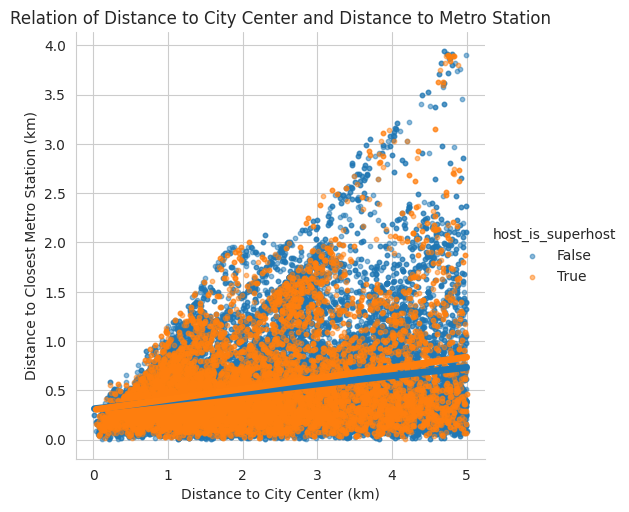

In [115]:
center_df = combined_df[(combined_df['dist'] <= 5) & (combined_df['metro_dist'] <= 4)]


sns.lmplot(
    x='dist', 
    y='metro_dist', 
    hue="host_is_superhost", 
    data=center_df, 
    scatter_kws={'alpha': 0.5, 's': 10},  # Reduce point size and add transparency
    line_kws={'lw': 5},  # Adjust line width for better visibility
)

plt.title('Relation of Distance to City Center and Distance to Metro Station')
plt.xlabel('Distance to City Center (km)')
plt.ylabel('Distance to Closest Metro Station (km)')
plt.show()

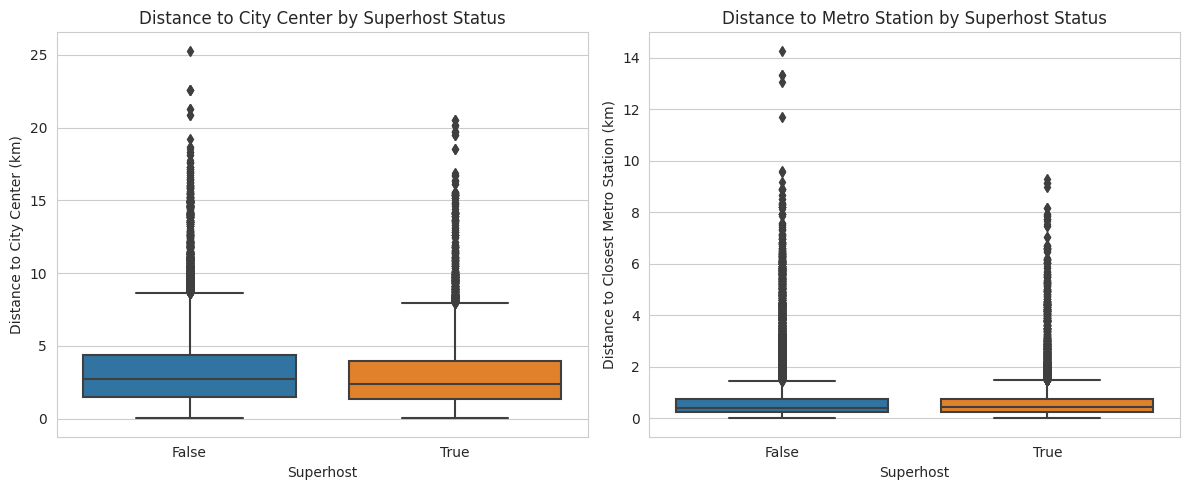

In [105]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for Distance to City Center
sns.boxplot(x='host_is_superhost', y='dist', data=combined_df, ax=axes[0])
axes[0].set_title('Distance to City Center by Superhost Status')
axes[0].set_xlabel('Superhost')
axes[0].set_ylabel('Distance to City Center (km)')

# Boxplot for Distance to Metro
sns.boxplot(x='host_is_superhost', y='metro_dist', data=combined_df, ax=axes[1])
axes[1].set_title('Distance to Metro Station by Superhost Status')
axes[1].set_xlabel('Superhost')
axes[1].set_ylabel('Distance to Closest Metro Station (km)')

plt.tight_layout()
plt.show()


## Conclusion
#### There is not a very clear evidence to support the thesis. Listings of superhosts are slightly closer to the city center on average. The biggest noticeable difference comes, when comparing the outliers, as normal hosts show to have more extreme outliers with long distances to both the City center and metro stations. 

## Are offers from Superhosts cleaner then those of normal hosts?

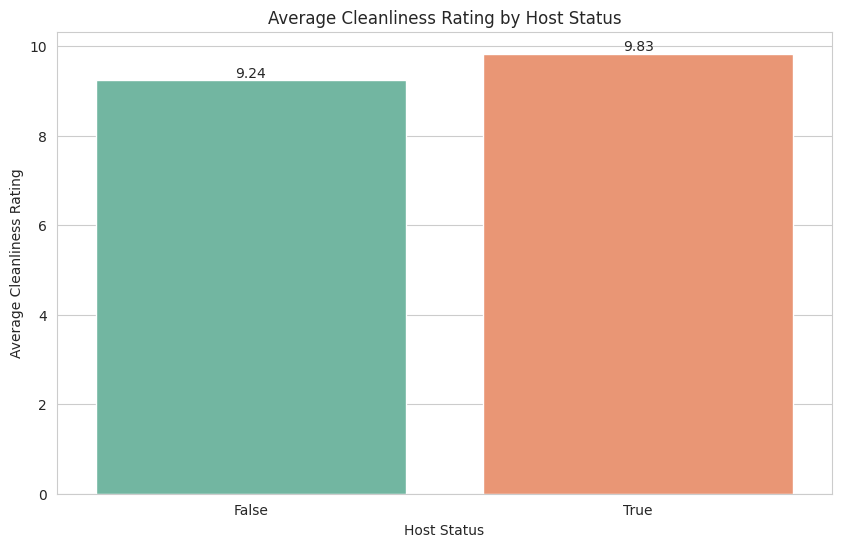

In [106]:

mean_cleanliness_by_host = combined_df.groupby('host_is_superhost')['cleanliness_rating'].mean().reset_index()
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='host_is_superhost', y='cleanliness_rating', data=mean_cleanliness_by_host, palette='Set2')

for index, row in mean_cleanliness_by_host.iterrows():
    ax.text(index, row['cleanliness_rating'], f'{row["cleanliness_rating"]:.2f}', ha='center', va='bottom')

plt.title('Average Cleanliness Rating by Host Status')
plt.xlabel('Host Status')
plt.ylabel('Average Cleanliness Rating')
plt.show()




## Conclusion
#### Yes. Superhosts are averaging extremely high cleanliness ratings and outperform normal hosts in this regard. This indicates, that cleanliness is an important factor to achieve superhost status. 

## Is there a pattern between room types and superhost status?


In [107]:
table_freq_row = pd.crosstab(combined_df['host_is_superhost'].map({True: 'Superhost', False: 'Regular Host'}), combined_df['room_type'], normalize='index') * 100
display(table_freq_row)


room_type,Entire home/apt,Private room,Shared room
host_is_superhost,,,
Regular Host,61.608837,37.546459,0.844704
Superhost,67.593712,32.096433,0.309855


<AxesSubplot: xlabel='host_is_superhost'>

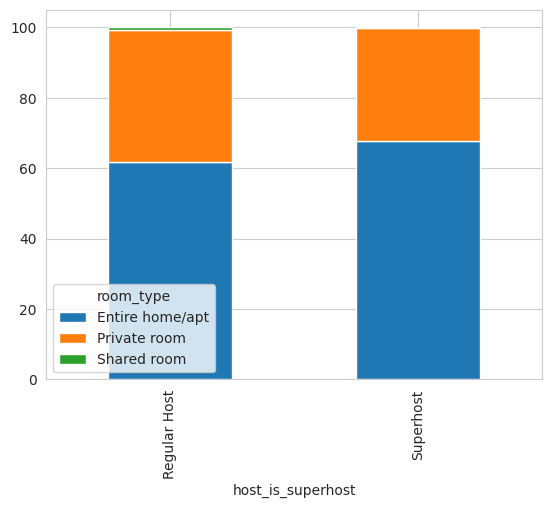

In [108]:
table_freq_row.plot(kind='bar', stacked=True)

## Conclusion
#### There is not much of a pattern change here. But it is noticeable, that there is a slight shift in percentages towards more private offers. With entire apartments having a larger percentage and shared room offers minimizing even further. 

## Is renting an entire home/apt more expensive than a private room? Does that depend on the city?

In [109]:
private_df = combined_df[combined_df['room_type'].isin(['Entire home/apt', 'Private room'])]

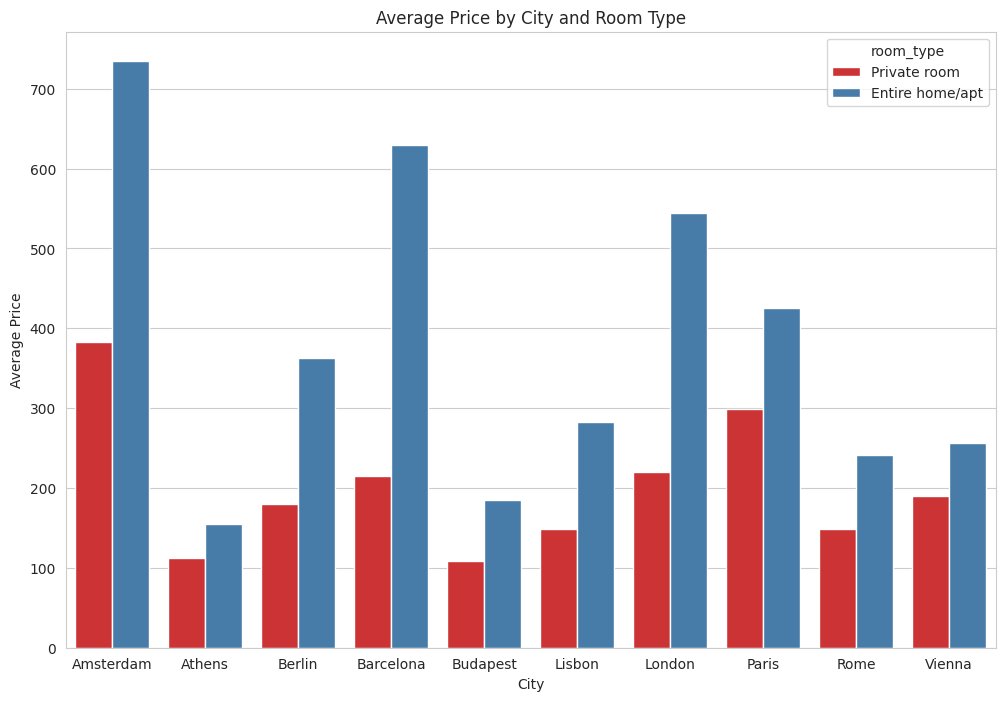

In [110]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='City', y='Price', hue='room_type', data=private_df, estimator='mean', errorbar=None, palette='Set1')

plt.title('Average Price by City and Room Type')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.show()

## Conclusion
#### Yes. Entire homes are more expensive than listings offering private rooms. This is the same for every city. The biggest increase here is Barcelona, where Prices for entire homes/apartments more than double in comparisont to private rooms. 

# Bonus question: Describing Gentrification
## How does the pricing of Airbnbs contribute to the phenomenon of "Gentrification"?

In [111]:
cheap_df = combined_df[combined_df["Price"] <= 300]

In [112]:
cheap_df['Monthly_Rent'] = cheap_df['Price'] * 30 * 0.7


/tmp/ipykernel_34/880523168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cheap_df['Monthly_Rent'] = cheap_df['Price'] * 30 * 0.7


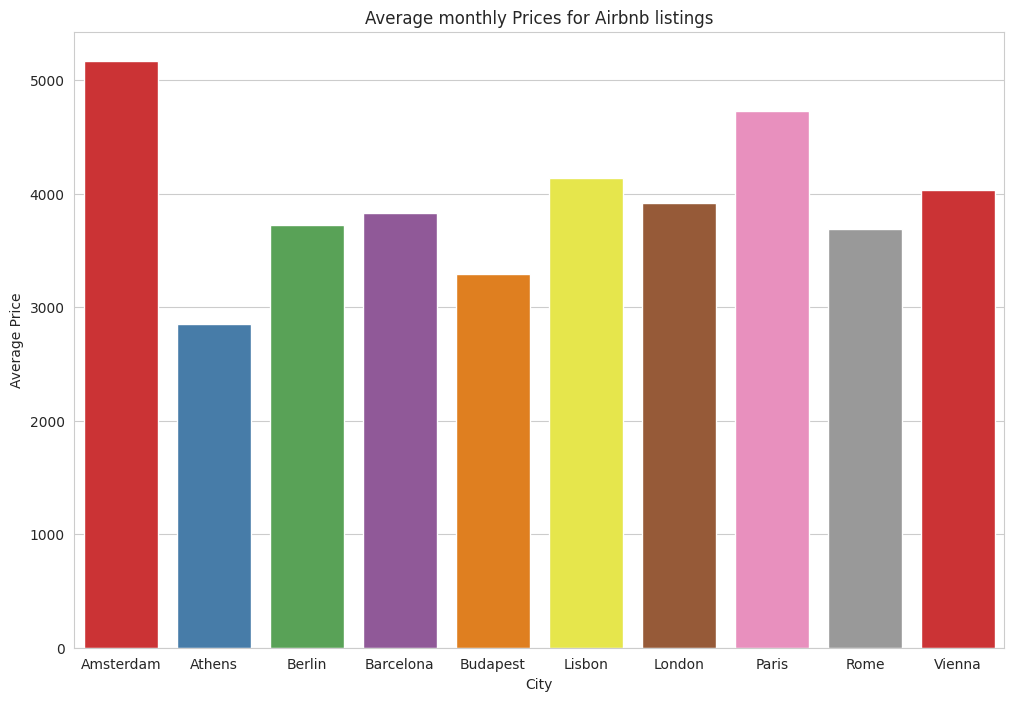

In [114]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='City', y='Monthly_Rent'
                 , data=cheap_df, estimator='mean', errorbar=None, palette='Set1')

plt.title('Average monthly Prices for Airbnb listings')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.show()

## Conclusion
#### When estimating monthly earning potentials of Airbnb listings, it becomes evident (even when accounting for 30%  vacancy or price reduction with longterm rentals) that these prices far exceed the regular rent prices in these cities. This leads to landlords and real estate investors choosing to turn their properties into Airbnb listings instead of renting them to residents, further amplifiying the housing shortage happening in most major european cities. As the number of housing decreases, rents are rising and further burden european residents. 